In [114]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(
    "vjchoudhary7/customer-segmentation-tutorial-in-python"
)

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

df = pd.read_csv(os.path.join(path, "Mall_Customers.csv"))

In [116]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [117]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [119]:
df.shape

(200, 5)

In [120]:
df.drop(["CustomerID"], axis=1, inplace=True)

In [121]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [122]:
df["Gender"] = df["Gender"].replace("Male", 1)
df["Gender"] = df["Gender"].replace("Female", 0)

/var/folders/v7/tlyx9w190ks2gfgzd_j0l5c80000gn/T/ipykernel_85459/1716590208.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace("Female", 0)


In [123]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [124]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [125]:
scaled_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [126]:
max_clusters = 50

In [127]:
kmeans_test = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_test[i].fit(scaled_df).inertia_ for i in range(len(kmeans_test))]

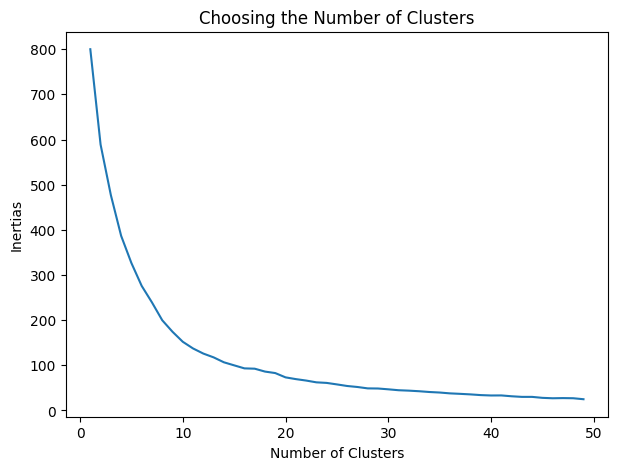

In [128]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertias")
plt.title("Choosing the Number of Clusters")
plt.show()

In [129]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_df)

KMeans(n_clusters=10, n_init=10)

In [130]:
clusters = kmeans.predict(scaled_df)

In [131]:
clusters

array([1, 1, 2, 7, 2, 7, 2, 7, 4, 7, 4, 7, 0, 7, 4, 1, 2, 1, 4, 7, 1, 1,
       0, 1, 0, 1, 0, 1, 2, 7, 4, 7, 4, 1, 0, 7, 0, 7, 2, 7, 0, 1, 5, 2,
       0, 7, 0, 2, 2, 2, 0, 1, 2, 5, 0, 5, 0, 5, 2, 5, 5, 1, 0, 0, 5, 1,
       0, 0, 1, 2, 5, 0, 0, 0, 5, 1, 0, 1, 2, 0, 5, 1, 5, 0, 2, 5, 0, 2,
       2, 0, 0, 1, 5, 2, 2, 1, 0, 2, 5, 1, 2, 0, 5, 1, 5, 2, 0, 5, 5, 5,
       5, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 6, 3, 2, 6, 8, 3, 8, 3, 8, 3,
       2, 6, 8, 6, 9, 3, 8, 6, 9, 3, 2, 6, 8, 3, 8, 6, 9, 3, 8, 3, 9, 6,
       9, 6, 8, 6, 8, 6, 9, 6, 8, 6, 8, 6, 8, 6, 9, 3, 8, 3, 8, 3, 9, 6,
       8, 3, 8, 3, 9, 6, 8, 6, 9, 3, 9, 3, 9, 6, 9, 6, 8, 6, 9, 6, 9, 3,
       8, 3], dtype=int32)

In [132]:
pca = PCA(n_components=2)

In [133]:
reduced_data = pd.DataFrame(pca.fit_transform(scaled_df), columns=["PC1", "PC2"])

In [134]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [135]:
kmeans.cluster_centers_

array([[-0.88640526,  1.01325595, -0.47702244, -0.2952865 ],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.88640526, -0.74039302, -0.39925223, -0.31316059],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [ 1.12815215,  1.19491538, -1.39547433, -1.51533492],
       [ 1.12815215,  1.42815712, -0.2675677 , -0.06405558],
       [-0.88640526, -0.45245636,  0.94327069,  1.17982252],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [ 1.12815215,  0.04664835,  0.93858626, -1.40339942],
       [-0.88640526,  0.41265847,  1.21277   , -1.11029664]])

In [136]:
reduced_centers = pca.transform(kmeans.cluster_centers_)

/Users/jeongho/Desktop/w25536-kaggle/kaggle/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [137]:
reduced_centers

array([[ 0.69507241, -1.05625787],
       [-0.68838314,  0.28733559],
       [-0.4994581 , -0.8167538 ],
       [-0.88272588,  1.65431318],
       [ 2.13571172, -0.64096681],
       [ 1.2923859 ,  0.34776935],
       [-1.33511175,  0.33485089],
       [-1.6696024 , -1.35294268],
       [ 1.25473165,  1.27579377],
       [ 0.83149037,  0.21501655]])

In [138]:
reduced_data["cluster"] = clusters

In [139]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,1
1,-1.427673,-0.367310,1
2,0.050761,-1.894068,2
3,-1.694513,-1.631908,7
4,-0.313108,-1.810483,2
...,...,...,...
195,-1.179572,1.324568,6
196,0.672751,1.221061,9
197,-0.723719,2.765010,3
198,0.767096,2.861930,8


In [140]:
reduced_data[reduced_data["cluster"] == 7]

,PC1,PC2,cluster
3,-1.694513,-1.631908,7
5,-1.717446,-1.599264,7
7,-2.148322,-1.505374,7
9,-1.216295,-1.616405,7
11,-1.689470,-1.545428,7
13,-1.646073,-1.522513,7
19,-1.663732,-1.432598,7
29,-1.964204,-1.212120,7
31,-1.689831,-1.224123,7
35,-1.903866,-1.104441,7


Text(0, 0.5, 'PC2')

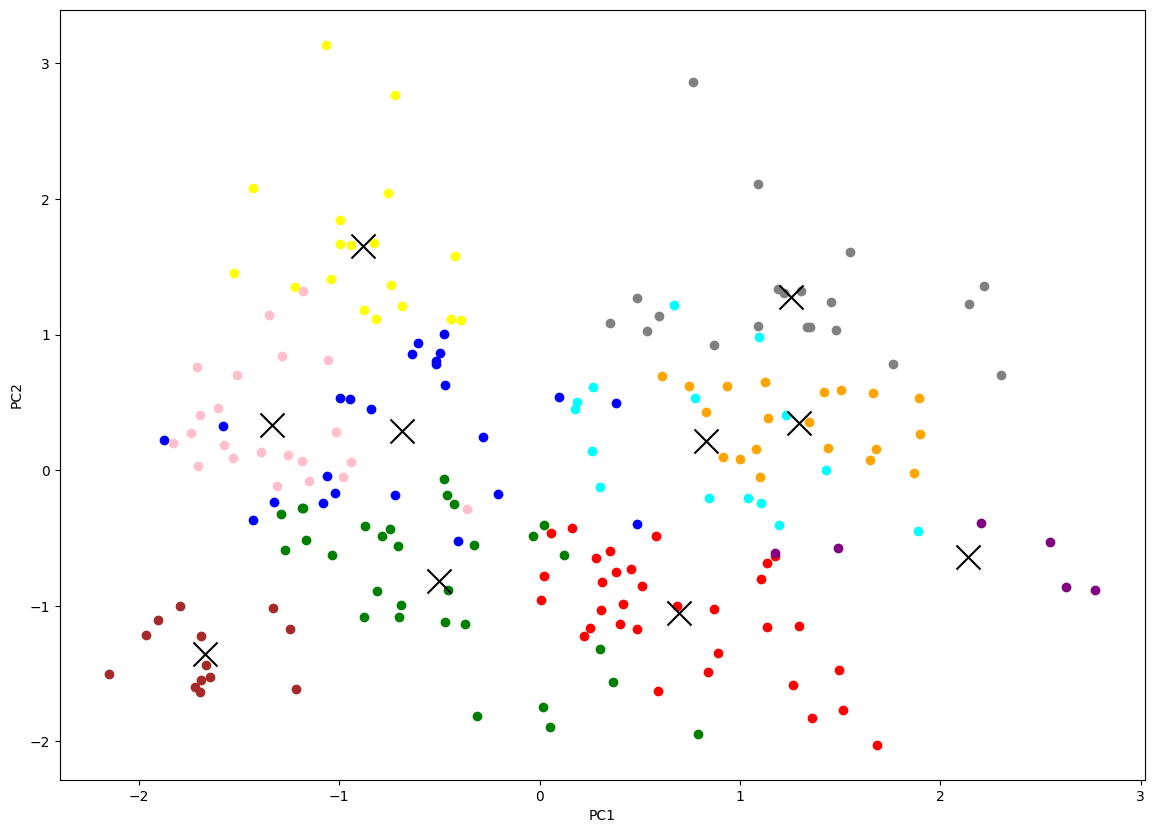

In [143]:
plt.figure(figsize=(14, 10))
plt.scatter(
    reduced_data[reduced_data["cluster"] == 0].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 0].loc[:, "PC2"],
    c="red",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 1].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 1].loc[:, "PC2"],
    c="blue",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 2].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 2].loc[:, "PC2"],
    c="green",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 3].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 3].loc[:, "PC2"],
    c="yellow",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 4].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 4].loc[:, "PC2"],
    c="purple",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 5].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 5].loc[:, "PC2"],
    c="orange",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 6].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 6].loc[:, "PC2"],
    c="pink",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 7].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 7].loc[:, "PC2"],
    c="brown",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 8].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 8].loc[:, "PC2"],
    c="gray",
)
plt.scatter(
    reduced_data[reduced_data["cluster"] == 9].loc[:, "PC1"],
    reduced_data[reduced_data["cluster"] == 9].loc[:, "PC2"],
    c="cyan",
)

plt.scatter(
    reduced_centers[:, 0], reduced_centers[:, 1], color="black", marker="x", s=300
)


plt.xlabel("PC1")
plt.ylabel("PC2")

In [112]:
reduced_centers[:, 0]

array([[-0.88272588,  1.65431318],
       [ 0.58233488, -0.85939176],
       [ 1.47661839,  0.1540349 ],
       [-0.662429  , -0.58044771],
       [ 0.71982753, -1.68765552],
       [ 1.19961046,  1.30582744],
       [-0.73489077,  0.27816597],
       [-1.38150389,  0.3644368 ],
       [-1.6696024 , -1.35294268],
       [ 0.81659377,  0.24505923]])